**credit orginal notebook can no longer open the link.
 In this version, I added
1.   The number of model
2.   cross validation
3.   interpret confusion matrix
<br>
The source data cannot be shared due to the company name.
<br>
This notebook use for data science project portfolio
**


In [ ]:
#install tensorflow_text library
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.6 MB/s eta 0:00:00


In [ ]:
#import library
import tensorflow_hub as hub
from tensorflow_text import SentencepieceTokenizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# The 16-language multilingual module is the default but feel free
# to pick others from the list and compare the results.
model_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3' #@param ['https://tfhub.dev/google/universal-sentence-encoder-multilingual/3', 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3']
use_model = hub.load(model_url)

In [ ]:
import pickle
# read dataset
with open('train_set_action.pkl', 'rb') as f:
  train_text, train_labels = pickle.load(f)
with open('test_set_action.pkl', 'rb') as f:
  test_text, test_labels = pickle.load(f)

In [ ]:
# data can not share because have company name

In [ ]:
train_text[190:200]


['จะรบกวนสอบถาม พอดีเปิดใช้บริการจะสมัครแพคเกจ ทำอย่างไรดีค่ะ',
 'จะยกเลิกการใช้งานอินเตอร์เน็ตครับ',
 'คือสมัครเป๊นอินต์รืไป แล้วได้ รับเอสเอ็มเอส พาสเวิร์ด ไวไฟ แล้วต้องทำยังไงต่อ ค่ะ',
 'ถามว่าเน็ตมันเล่นไม่ได้มันหมดแล้วรึเปล่าค่ะ',
 'ถ้าผมจะเติมตังให้อีกคนนึงทำยังไงครับ',
 'ถ้าจะเปลี่ยนโปรโมชั่นต้องทำอย่างไรบ้างค่ะ',
 'อยากทราบโปรโมชั่นเน็ตรายวันครับ',
 'อยากสอบถามหน่อยเปลี่ยนโปรศัพท์ใหม่ต้องโทรมาแจ้งมั้ยว่าใช้ยี่ห้ออะไร',
 'อยากทราบ ค่า โทร อ่ะค่ะว่าเกินจำนวนหรือยัง',
 'ซิมผมไม่มีสัญญาณเลยอ่ะพี่']

In [ ]:
train_labels[190:200]

['enquire',
 'cancel',
 'enquire',
 'enquire',
 'enquire',
 'change',
 'enquire',
 'enquire',
 'enquire',
 'report']

In [ ]:
train_labels[0:10]
df_train_label = pd.DataFrame({
                                "sevice_label":train_labels}
                              )

In [ ]:
df_train_label.shape

(11981, 1)

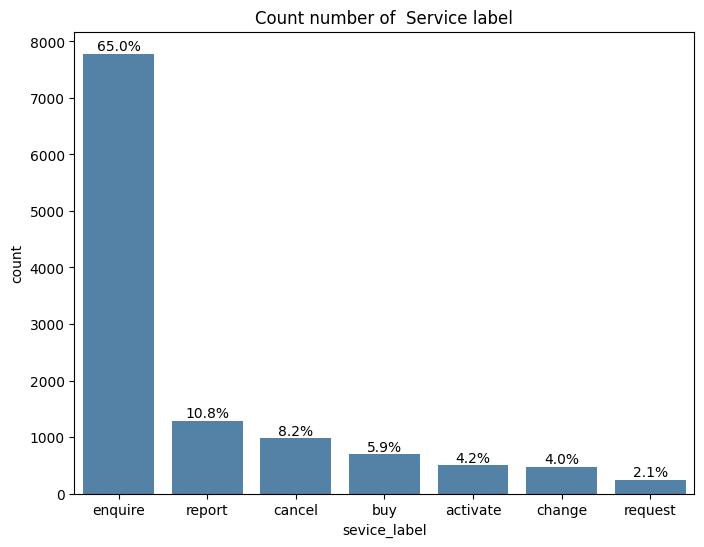

In [ ]:
#plot count plot labels
plt.figure(figsize=(8, 6))
plt.title("Count number of  Service label")
ax = sns.countplot(
                data=df_train_label
                , x="sevice_label"
                ,color="steelblue"
                ,order=df_train_label['sevice_label'].value_counts().index
              )

# Add percentage labels to each bar
total = len(df_train_label['sevice_label'])  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total:.1%}', ha="center", va="bottom")

# Display the plot
plt.show()



In [ ]:
#use model to encode  test to vector
def batch_feed(texts, batch_size=32):
  """Feed the text as batches to avoid an OOM problem"""
  results = []
  for i in range(0, len(texts), batch_size):
    vectors = use_model(texts[i:i+batch_size]) # Feed to USE
    vectors = vectors.numpy() # Convert from tf.Tensor to numpy array
    results.append(vectors)
  results = np.concatenate(results, axis=0)
  return results

In [ ]:
# convert text to vector
encoded_train_text = batch_feed(train_text)
encoded_test_text = batch_feed(test_text)

In [ ]:
encoded_train_text

array([[-0.03646604, -0.02232999, -0.02043178, ...,  0.00611013,
        -0.00996149, -0.01953637],
       [-0.03400614, -0.03798914, -0.04153144, ...,  0.00157045,
        -0.06651151, -0.05295896],
       [-0.03834369, -0.00584406,  0.01191106, ...,  0.06175842,
         0.0021097 ,  0.05262645],
       ...,
       [-0.07210915, -0.01481912, -0.04776485, ...,  0.10545672,
         0.00224464,  0.06660947],
       [-0.0867334 , -0.00909525,  0.03026995, ..., -0.00349686,
        -0.02216577,  0.01119693],
       [-0.00387304, -0.0066609 ,  0.00415037, ...,  0.04632661,
        -0.02787762,  0.05168079]], dtype=float32)

In [ ]:
#method for cross validation
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
def train_and_cross_validate(model,X_train,Y_train,scoring):
  results = cross_val_score(estimator = model,
                          X = X_train,
                          y = Y_train,
                          cv = 10,
                          scoring = scoring)
  mean = results.mean()
  std =  results.std()
  print(f"F1 marcro mean= {mean} std= {std}")
  return results

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(C=4, max_iter=1000, random_state=42)
SCORING = 'f1_macro'
logistic_f1_macro_score = train_and_cross_validate(logistic_model,encoded_train_text,train_labels,SCORING)

F1 marcro mean= 0.7522813179148027 std= 0.020403481967007486


In [ ]:
logistic_model.fit(encoded_train_text, train_labels)

LogisticRegression(C=4, max_iter=1000, random_state=42)

In [ ]:
test_predict = logistic_model.predict(encoded_test_text)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
#plot confusion mastrix
def plot_confusion_mastrix(test_labels, test_predict,label_list):
  cm = confusion_matrix(test_labels, test_predict)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
  disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
  plt.show()
  print(classification_report(test_labels, test_predict, digits=3))

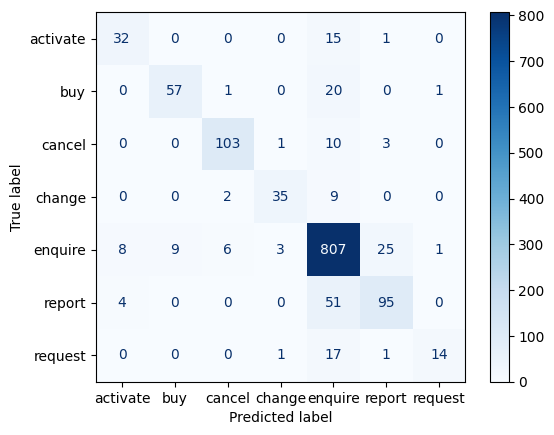

              precision    recall  f1-score   support

    activate      0.727     0.667     0.696        48
         buy      0.864     0.722     0.786        79
      cancel      0.920     0.880     0.900       117
      change      0.875     0.761     0.814        46
     enquire      0.869     0.939     0.903       859
      report      0.760     0.633     0.691       150
     request      0.875     0.424     0.571        33

    accuracy                          0.858      1332
   macro avg      0.841     0.718     0.766      1332
weighted avg      0.856     0.858     0.853      1332



In [ ]:
target_names = ['activate', 'buy', 'cancel', 'change','enquire','report','request']
plot_confusion_mastrix(test_labels, test_predict,target_names)

In [ ]:
# dummy classifier baseline
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(encoded_train_text, train_labels)

dummy_f1_macro_score = train_and_cross_validate(dummy_model,encoded_train_text,train_labels,SCORING)

F1 marcro mean= 0.112522126107731 std= 3.918669580344952e-05


In [ ]:
test_predict = dummy_model.predict(encoded_test_text)

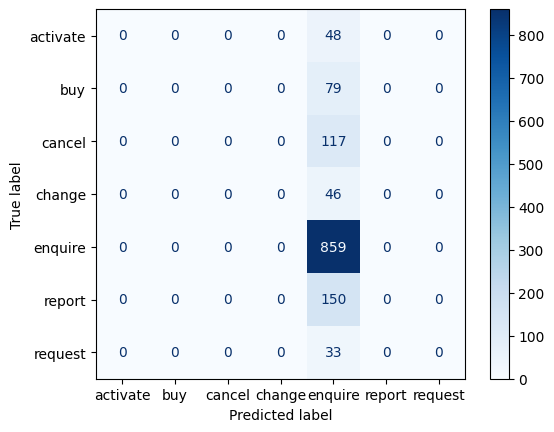

              precision    recall  f1-score   support

    activate      0.000     0.000     0.000        48
         buy      0.000     0.000     0.000        79
      cancel      0.000     0.000     0.000       117
      change      0.000     0.000     0.000        46
     enquire      0.645     1.000     0.784       859
      report      0.000     0.000     0.000       150
     request      0.000     0.000     0.000        33

    accuracy                          0.645      1332
   macro avg      0.092     0.143     0.112      1332
weighted avg      0.416     0.645     0.506      1332



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
plot_confusion_mastrix(test_labels, test_predict,target_names)

In [ ]:
#svm
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=4)
svm_rbf_f1_macro_score = train_and_cross_validate(svm_model,encoded_train_text,train_labels,SCORING)

F1 marcro mean= 0.7765013465270375 std= 0.0152201736803468


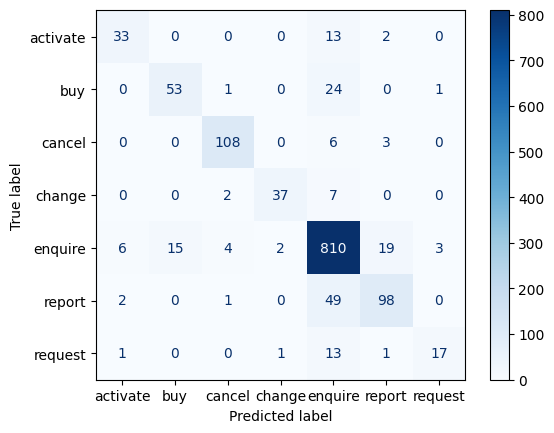

              precision    recall  f1-score   support

    activate      0.786     0.688     0.733        48
         buy      0.779     0.671     0.721        79
      cancel      0.931     0.923     0.927       117
      change      0.925     0.804     0.860        46
     enquire      0.879     0.943     0.910       859
      report      0.797     0.653     0.718       150
     request      0.810     0.515     0.630        33

    accuracy                          0.868      1332
   macro avg      0.844     0.742     0.786      1332
weighted avg      0.865     0.868     0.863      1332



In [ ]:
svm_model.fit(encoded_train_text, train_labels)
test_predict = svm_model.predict(encoded_test_text)
plot_confusion_mastrix(test_labels, test_predict,target_names)

In [ ]:
svm_poly_model = SVC(kernel='poly', C=4)

svm_poly_f1_macro_score = train_and_cross_validate(svm_poly_model,encoded_train_text,train_labels,SCORING)

F1 marcro mean= 0.7569917853028201 std= 0.015312462940418292


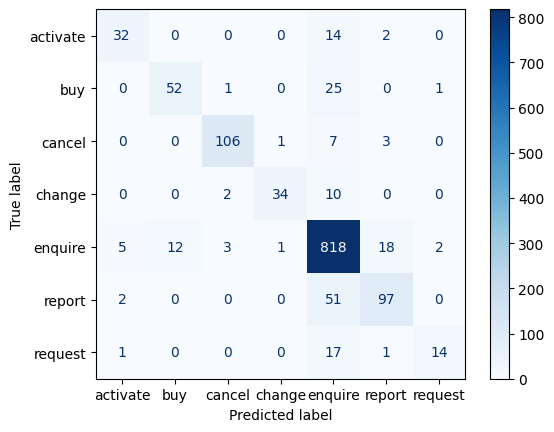

              precision    recall  f1-score   support

    activate      0.800     0.667     0.727        48
         buy      0.812     0.658     0.727        79
      cancel      0.946     0.906     0.926       117
      change      0.944     0.739     0.829        46
     enquire      0.868     0.952     0.908       859
      report      0.802     0.647     0.716       150
     request      0.824     0.424     0.560        33

    accuracy                          0.866      1332
   macro avg      0.857     0.713     0.771      1332
weighted avg      0.863     0.866     0.860      1332



In [ ]:
svm_poly_model.fit(encoded_train_text, train_labels)
test_predict = svm_poly_model.predict(encoded_test_text)
plot_confusion_mastrix(test_labels, test_predict,target_names)

In [ ]:
# cross validation dataframe
df_cv_val  = pd.DataFrame(
    {
        "Dummy":dummy_f1_macro_score
        ,"Logistic":logistic_f1_macro_score
        ,"svm[k=rbf]":svm_rbf_f1_macro_score
        ,"svm[k=poly]":svm_poly_f1_macro_score
    }
)

In [ ]:
df_cv_val.describe().T

,count,mean,std,min,25%,50%,75%,max
Dummy,10.0,0.112522,0.000041,0.112493,0.112493,0.112493,0.112566,0.112580
Logistic,10.0,0.752281,0.021507,0.700958,0.745506,0.755325,0.763773,0.776471
svm[k=rbf],10.0,0.776501,0.016043,0.740030,0.774266,0.778172,0.784899,0.800703
svm[k=poly],10.0,0.756992,0.016141,0.732923,0.750222,0.752777,0.764073,0.793163


In [ ]:

cv_f1_macro = [
                    dummy_f1_macro_score
                    ,logistic_f1_macro_score
                    ,svm_rbf_f1_macro_score
                    ,svm_poly_f1_macro_score

                    ]

cv_f1_macro_no_dummy = [
                          logistic_f1_macro_score
                          ,svm_rbf_f1_macro_score
                          ,svm_poly_f1_macro_score]

Text(0.5, 1.0, ' Model performance ')

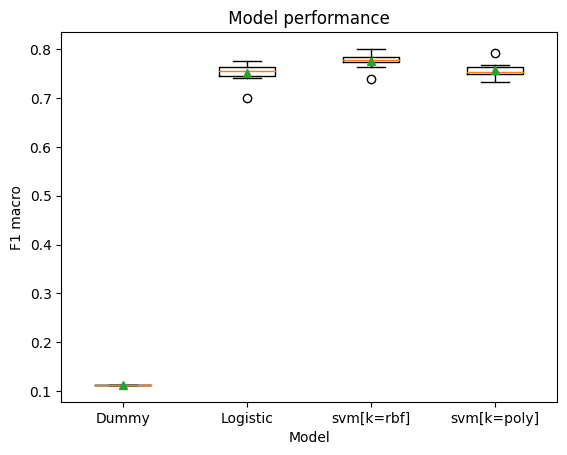

In [ ]:
plt.boxplot(cv_f1_macro,showmeans=True)
plt.xticks([1,2,3,4],['Dummy', 'Logistic', 'svm[k=rbf]', 'svm[k=poly]'])
plt.ylabel("F1 macro")
plt.xlabel("Model")
plt.title(" Model performance ")

Text(0.5, 1.0, ' Model performance ')

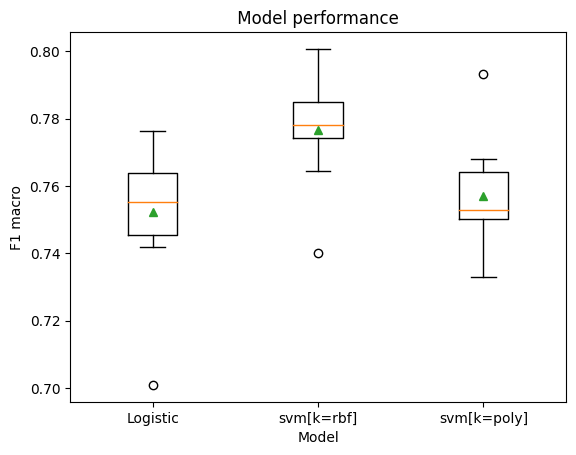

In [ ]:
plt.boxplot(cv_f1_macro_no_dummy,showmeans=True)
plt.xticks([1,2,3],['Logistic', 'svm[k=rbf]', 'svm[k=poly]'])
plt.ylabel("F1 macro")
plt.xlabel("Model")
plt.title(" Model performance ")

In [ ]:
#performance test data set
model_list = ["Dummy",'svm[k=poly]','svm[k=rbf]']

# from hold out report test
f1_macro = [0.112,0.766, 0.771,]

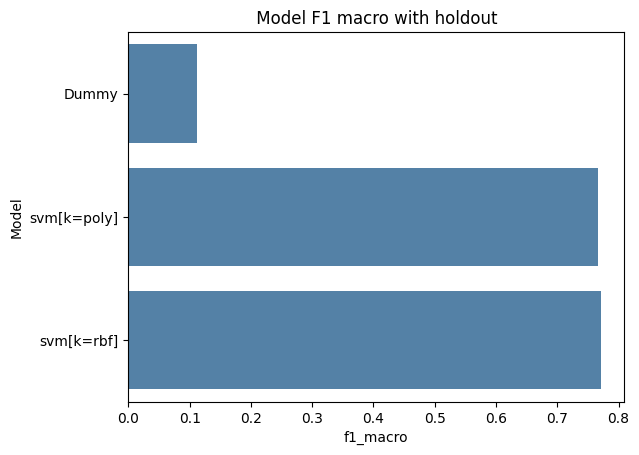

In [ ]:
df_holdout = pd.DataFrame(
    {
        "model_list":model_list
        ,"f1_macro":f1_macro
    }
)

sns.barplot(data=df_holdout,y="model_list",x="f1_macro",color='steelblue')
plt.ylabel("Model")
plt.xlabel("f1_macro")
plt.title(" Model F1 macro with holdout ")
plt.show()